# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования:**

1. Рассмотреть какие факторы больше всего влияют на общую (полную) стоимость объекта.

2. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и в 10 населённых пунктах с наименьшим числом объявлений.

3. Вычислить среднюю цену каждого километра при отдалении от центра города.

4. Проверить и отследить аномалии в данных.

**Ход исследования**

Данные о недвижимости я получу из файла `real_estate_data.csv` - архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. О качестве данных пока ничего не известно, поэтому перед началом работы понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к исследовательскому анализу.

Таким образом, моё исследование пройдет в несколько этапов:

- Обзор данных.

- Предобработка данных.

- Расчеты и добавление новых столбцов в таблицу.

- Изучение и описание параметров таблицы.

- Какие факторы больше всего влияют на общую (полную) стоимость объекта.

- Расчет средней цены одного квадратного метра в населённых пунктах с наибольшим числом объявлений и в населенных пунктах с наименьшим числом объявлений.

- Расчет средней цены каждого километра при отдалении от центра города.

- Написание общего вывода по анализу данных.

### Откроем файл с данными и изучим общую информацию. 

**1.1 Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

**1.2 Выведем первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3 Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**1.4 Построим общую гистограмму для всех числовых столбцов датафрейма `data`. Для просмотра статистической сводки каждого столбца, чтобы узнать распределение данных в каждом столбце используем метод *describe()***

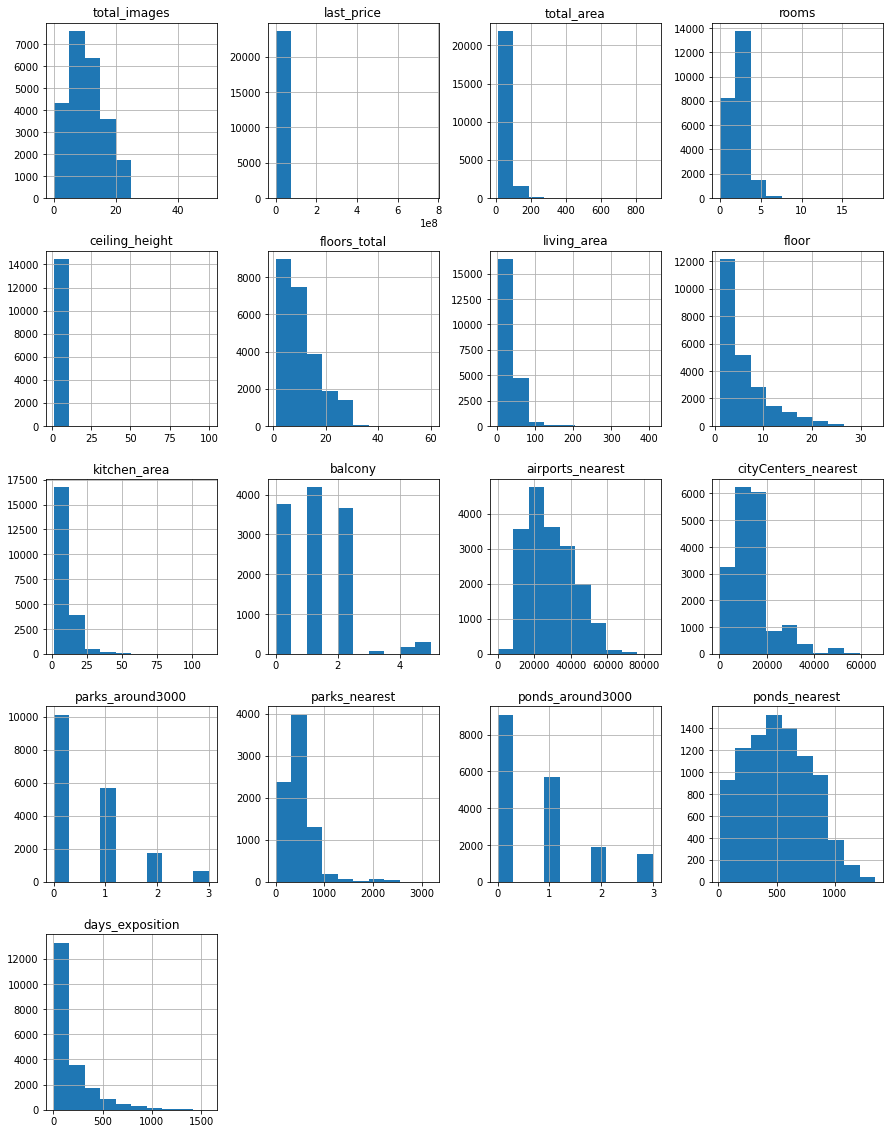

In [4]:
data.hist(figsize=(15, 20))
plt.show()

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод, исходя из общих данных датафрейма `data`:**
1. в некоторых столбцах имеются пропуски данных (надо изучить характер данных пропусков и решить - удалить данные строки или откорректировать);
2. некорректное отображение некоторых данных (в частности в столбце *first_day_exposition* на всех позициях сбились часы - надо решить, нужна ли эта информация дальше для исследования или о данном баге следует рассказать коллегам и забыть про него);
3. проверить наличие дубликатов;
4. по гистограммам виден большой разброс данных в некоторых столбцах, необходимо проверить их на наличие "выбросов" и откорректировать.

### Предобработка данных

**2.1 Выведем количество пропущенных значений для каждого столбца.**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**2.2 Заменим пропущенные значения в столбце *locality_name* на строку `'Unknown'`. Также найдем неявные дубликаты в названиях населенных пунктов и заменим. Заменяем все "ё" на "е" в слове "посёлок", заменим "городской поселок" на "поселок городского типа".**

In [8]:
data['locality_name'] = data['locality_name'].fillna('Unknown')

In [9]:
data['locality_name'].sort_values().unique()

array(['Unknown', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

In [10]:
data['locality_name'].nunique()

365

In [11]:
data = data.apply(lambda x: x.replace({'поселок':'посёлок',
                                       'городской посёлок': 'посёлок',
                                       'посёлок городского типа': 'посёлок',
                                       'коттеджный посёлок': 'посёлок',
                                       'посёлок при железнодорожной станции': 'посёлок станции'},
                                      regex=True)
                 )
len(data.locality_name.unique())

334

**2.3 Заменим пропущенные значения в столбце *balcony* на значение `'0'`. Предположим, что значение пропущено, потому что в квартире нет балкона. Поменяем тип данных с `float` на `int`, т.к. количество балконов это целые числа.**

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype(int)

**2.4 Заменим пропущенные значения в столбце *ceiling_height*. Рассмотрим аномалии, в частности высоту потолков больше 10 метров. Высота потолков в Санкт-Петербурге в среднем идет от 2.4 до 10 метров, аномалии с высотой больше 10 метров могли возникнут из-за некорректной выгрузки данных или ошибки оператора при заполнении данных. Предположим, что некоторые числа сбились на определенный порядок, например вместо 100.0 метров имелось ввиду 10.0 метров и т.д. Исправим данные в столбце, разделим все числа больше 20 на 10.**

In [13]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [14]:
data['ceiling_height'].nunique()

183

In [15]:
def ceiling_heights (height):
    
    try:
        if (height < 20):
            return height
        
    except:
        return (height / 10)

data['ceiling_height'] = data['ceiling_height'].apply(ceiling_heights)

In [16]:
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.3 ,  2.34,  2.4 ,
        2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,
        2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,
        2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,
        2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,
        2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,
        2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,
        2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,  3.35,
        3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,
        3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,
        3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,  3.65,
        3.66,  3.67,

In [17]:
data['ceiling_height'].nunique()

174

**Заменим пропуски высот потолков на значения, относительно своего района.**

In [18]:
warnings.filterwarnings('ignore')
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median

In [19]:
data['ceiling_height'].isna().sum()

115

**Все что не заполнилось, заполняем общей медианой.**

In [20]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [21]:
data['ceiling_height'].isna().sum()

0

**Значения высоты потолков менее 2.4 метров тоже скорее всего являются аномальными, но так как сложно предположить откуда эта аномалия взялась, оставим пока как есть.**

**2.5 Заменим пропуски данных в столбцах `living_area` и `kitchen_area`. В столбце общей площади `total_area` пропусков нет. Так как `total_area` состоит из `living_area` + `kitchen_area` + площадь коридоров и санузлов, предположим, что есть некоторая связь между значениями этих площадей. Тогда, зная значения `total_area` и вычислив долю (`living_area` + `kitchen_area`) в общей площади, мы сможем заполнить недостающие значения. Если данные и в `living_area` и в `kitchen_area` отсутствуют, то пока оставим эти строки без изменений.**

In [22]:
data_area_share = (data['living_area'] + data['kitchen_area']) / data['total_area']
print(data_area_share.mean())
data_area_share.median()

0.7494943137617899


0.75

**И медиана и среднее получились равными 0,75 - это средняя доля `living_area` + `kitchen_area` в общей площади `total_area`. Тогда, для вычисления недостающих пропусков выполним следующие выражения:**

1. `living_area` = 0,75 * `total_area` - `kitchen_area`
2. `kitchen_area` = 0,75 * `total_area` - `living_area`

In [23]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.75 - data['kitchen_area'])

In [24]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.75 - data['living_area'])

In [25]:
print(data['living_area'].isna().sum())
data['kitchen_area'].isna().sum()

1464


1464

**Строк, где данные и в `living_area` и в `kitchen_area` отсутствуют - 1464. В общем объеме данных это примерно 6.2%, поэтому на итоги исследования не должно сильно повлиять.**

**2.6 Заполним пропуски в данных `parks_around3000` и `ponds_around3000`. Предположим, что вместо пропусков должно быть `'0'`и при заполнении данных это забыли указать.**

In [26]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**2.7 `is_apartment` - имеет наибольшее количество пропусков (20924), возможно потому что при заполнении было не известно, является ли квартира апартаментами или нет. Изменим тип данных на *bool*. Пропуски заполним значением *False*.**

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [28]:
data['is_apartment'].head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: is_apartment, dtype: bool

**2.8 `floors_total` - имеет 86 пропусков (мало, чтобы как то повлиять на анализ) - нет данных для заполнения данных пропусков, поэтому просто их удалим.**

In [29]:
data = data.dropna(subset=['floors_total'])

**2.9 `days_exposition` - 3181 (13,4%) пропусков. В данном столбце данные скорее всего собираются автоматизированно и пропуск означает, что публикация либо не снята до сих пор, либо произошел баг при выгрузке. Эти данные мы никак откорректировать не сможем, поэтому тоже их удалим.**

In [30]:
data = data.dropna(subset=['days_exposition'])

**2.10 Изменим название столбца `cityCenters_nearest` чтобы убрать верхний регистр букв.**

In [31]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

**Заполним пропуски столбца `city_centers_nearest` в зависимости от населенного пункта.**

In [32]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == locality_name), 'city_centers_nearest'] = median

**Оставшиеся пропуски заполнять медианным значением будет некорректно, поэтму оставим как есть.**

**2.11 Рассмотрим оставшиеся столбцы с пропусками.**

`airports_nearest`, `city_centers_nearest` - 4666 и 4605 пропусков соответственно.  Есть возможность в случае необходимости указать примерные значения от населенного пункта (условно от центра населенного пункта) до центра города и аэропорта, но данные будут не точные, так как мы не знаем точного расположения дома с квартирой. Скорее всего из-за этого в данных столбцах имеются пропуски, не было возможности посчитать, либо получались слишком большие расстояния и информация не казалась интересной. Заполнять данные пропуски пока не будем и оставим как есть.

`parks_nearest`, `ponds_nearest`- 13539 (66,2%) и 12594 (61,6%) пропусков соответственно. Рассматривая столбцы `parks_around3000` и `ponds_around3000` и сгруппировав их по количеству в радиусе 3 км, можно увидеть явную закономерность. Ноль парков в радиусе 3 км - 13543 и ноль водоемов в радиусе 3 км - 12594, что практически соответствует значениям пропусков в `parks_nearest`, `ponds_nearest`. Отсюда можно сделать вывод, что парки и пруды для данных пропущенных квартир находятся на расстоянии больше, чем 3 км. Точных значений мы не знаем, поэтому оставим столбцы без изменений.


In [33]:
data.groupby('parks_around3000')['ponds_around3000'].count()

parks_around3000
0.0    13543
1.0     4856
2.0     1497
3.0      545
Name: ponds_around3000, dtype: int64

In [34]:
data.groupby('ponds_around3000')['parks_around3000'].count()

ponds_around3000
0.0    12594
1.0     4945
2.0     1636
3.0     1266
Name: parks_around3000, dtype: int64

In [35]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1323
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1323
balcony                     0
locality_name               0
airports_nearest         4666
city_centers_nearest     4605
parks_around3000            0
parks_nearest           13539
ponds_around3000            0
ponds_nearest           12594
days_exposition             0
dtype: int64

**2.12 Преобразуем данные в столбцах `airports_nearest`, `city_centers_nearest`. Округлим расстояние из метров в километры для удобства чтения и запишем в новые столбцы `airports_nearest_km` и `city_centers_nearest_km`.** 

In [36]:
data['airports_nearest_km'] = (data['airports_nearest'] / 1000).round(0)

In [37]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)

**2.13 Изменим тип данных для `last_price`, `ponds_around3000`, `parks_around3000`, `floors_total`, `days_exposition` на *int*, так как данные в этих столбцах принимают целочисленные значения и пропусков в данных нет. Так в столбце `last_price` не будем учитывать "копейки", `ponds_around3000`, `parks_around3000` - количество парков и водоемов - целое число, `floors_total` - целое число этажей, `days_exposition` - целое число дней.**

In [38]:
data['last_price'] = data['last_price'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

**2.14 Изменим тип данных для `first_day_exposition` на *datetime* для анализа в дальнейшем. Так как показания `часов:минут:секунд = 0:00:00` и не несут какой-то важной информации, то отбросим их.**

In [39]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

**2.15 Проверим количество дубликатов.**

In [40]:
data.duplicated().sum()

0

**2.16 Проверим столбцы с высоким стандартным отклонением методом `boxplot()`. Построим методом *describe()* числовые значения диаграммы размаха. Стандартное отклонение *std* - это отклонение значений от среднего числа *mean*. Если данное значение большое и стремится к среднему - значит где то в данных есть "выброс".**

In [41]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_km,city_centers_nearest_km
count,20441.000000,2.044100e+04,20441.000000,20441.000000,20441.000000,20441.000000,19118.000000,20441.000000,19118.000000,20441.000000,15775.000000,15836.000000,20441.000000,6902.000000,20441.000000,7847.000000,20441.000000,15775.000000,15836.000000
mean,9.627513,6.265166e+06,58.857697,2.024999,2.700930,10.860770,33.610372,5.972800,10.266574,0.593758,28831.875372,14287.697840,0.464018,490.796436,0.587789,520.441697,180.884839,28.839493,14.280816
std,5.659154,1.087821e+07,34.061930,1.055000,0.248414,6.652375,21.470044,4.933872,5.925883,0.950038,12702.145028,8567.946162,0.745101,344.370477,0.879777,277.278238,219.685543,12.705103,8.575511
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-47.500000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,0.000000
25%,6.000000,3.400000e+06,39.580000,1.000000,2.550000,5.000000,18.300000,2.000000,7.000000,0.000000,18495.500000,9465.000000,0.000000,287.000000,0.000000,300.000000,45.000000,18.000000,9.000000
50%,9.000000,4.500000e+06,50.800000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26767.000000,13149.000000,0.000000,451.500000,0.000000,505.000000,95.000000,27.000000,13.000000
75%,14.000000,6.500000e+06,67.800000,3.000000,2.700000,16.000000,41.600000,8.000000,11.800000,1.000000,37407.000000,16364.500000,1.000000,613.000000,1.000000,731.500000,232.000000,37.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,135.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,85.000000,66.000000


**Замечаем аномалию в виде отрицательных значений площади кухни. Скорее всего это просто ошибка при выгрузке, поэтому заменим все отрицательные значения положительными с помощью метода `abs()`.**

In [42]:
data['kitchen_area'] = data['kitchen_area'].abs()

**Видим что в столбцах `total_area` (общая площадь), `living_area` (жилая площадь), `kitchen_area` (площадь кухни) стандартное отклонение очень большое, больше чем в половину от среднего. Построим коробчатую диаграмму и определим по ней "выбросы".**

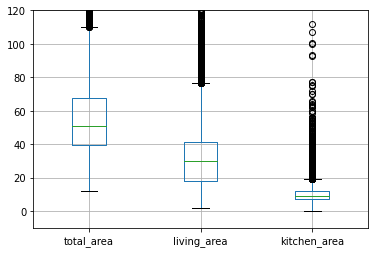

In [43]:
data.boxplot(column=['total_area', 'living_area', 'kitchen_area'])
plt.ylim(-10, 120)
plt.show()

**Нормальные значения:**

- для `total_area` будет площадь от 12 до 110 кв. метров.

- для `living_area` будет площадь от 2 до 75 кв. метров.

- для `kitchen_area` будет площадь от 0 до 20 кв. метров.

**Остальные значения являются выбросами, их мы удалим**

In [44]:
data.drop(index=data.query('total_area < 12').index,inplace=True)
data.drop(index=data.query('total_area > 100').index,inplace=True)

In [45]:
data.drop(index=data.query('living_area < 2').index,inplace=True)
data.drop(index=data.query('living_area > 75').index,inplace=True)

In [46]:
data.drop(index=data.query('kitchen_area > 20').index,inplace=True)

**В столбцах `airports_nearest`, `city_centers_nearest`, `parks_nearest` и `ponds_nearest` стандартное отклонение также большое. Построим коробчатую диаграмму и определим по ней "выбросы".**

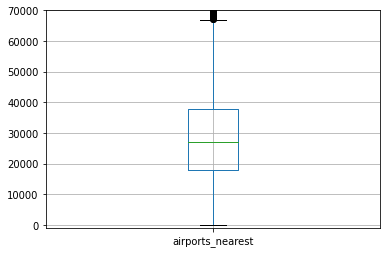

In [47]:
data.boxplot(column=['airports_nearest'])
plt.ylim(-1000, 70000)
plt.show()

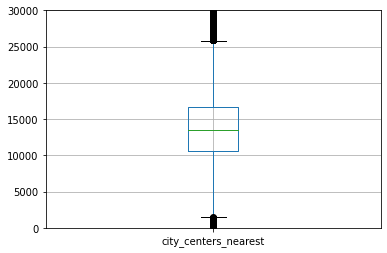

In [48]:
data.boxplot(column=['city_centers_nearest'])
plt.ylim(0, 30000)
plt.show()

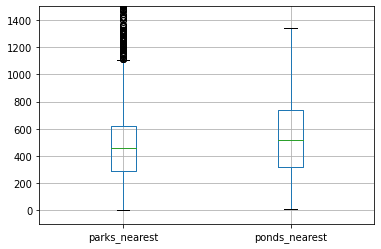

In [49]:
data.boxplot(column=['parks_nearest', 'ponds_nearest'])
plt.ylim(-100, 1500)
plt.show()

**Нормальные значения:**

- для `airports_nearest` будет расстояние от 0 до 65000 метров.

- для `city_centers_nearest` будет расстояние от 208 до 27000 метров.

- для `parks_nearest` будет расстояние от 1 до 1100 метров.

- для `ponds_nearest` будет расстояние от 13 до 1300 метров.

**Остальные значения являются выбросами, их мы удалим**

In [50]:
data.drop(index=data.query('airports_nearest > 65000').index,inplace=True)

In [51]:
data.drop(index=data.query('city_centers_nearest > 27000').index,inplace=True)

In [52]:
data.drop(index=data.query('parks_nearest > 1100').index,inplace=True)

**В столбце `days_exposition` стандартное отклонение также большое. Построим коробчатую диаграмму и определим по ней "выбросы".**

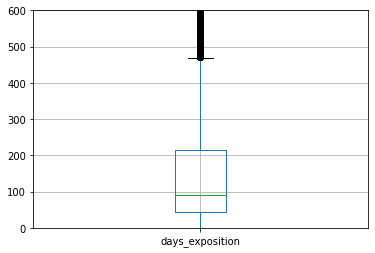

In [53]:
data.boxplot(column=['days_exposition'])
plt.ylim(0, 600)
plt.show()

**Нормальные значения для столбца `days_exposition`: от 1 до 480. Все остальное это выброс - удаляем.**

In [54]:
data.drop(index=data.query('days_exposition > 480').index,inplace=True)

**Рассмотрим столбец `last_price`. Построим коробчатую диаграмму и определим по ней "выбросы".**

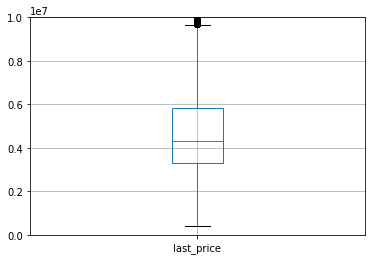

In [55]:
data.boxplot(column=['last_price'])
plt.ylim(0, 10000000)
plt.show()

**Нормальные значения для столбца `last_price`: от 12_190 до 10_000_000. Все остальное это выброс - удаляем.**

In [56]:
data.drop(index=data.query('last_price > 10000000').index,inplace=True)

**Рассмотрим столбец `ceiling_height`. В нем нет каких-либо критичных отклонений, но по нормам высота потолка в квартире должна быть от 2.4 до 10 метров. Удалим значения, которые не входят в этот диапазон.**

In [57]:
data.drop(index=data.query('ceiling_height < 2.4').index,inplace=True)
data.drop(index=data.query('ceiling_height > 10').index,inplace=True)

**2.17 Таблица готова для дальнейшего анализа.**

In [58]:
data.reset_index(drop=True,inplace=True) # Сбросим индексы

In [59]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_km,city_centers_nearest_km
0,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,13.0,19.0
1,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,NaN,NaN
2,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,53.0,19.0
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189,NaN,NaN
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,51.0,15.0
5,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,38.0,14.0
6,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,False,...,Сертолово,NaN,NaN,0,NaN,0,NaN,90,NaN,NaN
7,16,4650000,39.00,2017-11-18,1,2.70,14,20.50,5,False,...,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19,13.0,14.0
8,11,6700000,82.00,2017-11-23,3,3.05,5,55.60,1,False,...,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397,22.0,11.0
9,8,3250000,31.00,2017-01-27,1,2.50,5,19.40,2,False,...,Санкт-Петербург,44060.0,10842.0,1,759.0,0,NaN,168,44.0,11.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15016 entries, 0 to 15015
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15016 non-null  int64         
 1   last_price               15016 non-null  int64         
 2   total_area               15016 non-null  float64       
 3   first_day_exposition     15016 non-null  datetime64[ns]
 4   rooms                    15016 non-null  int64         
 5   ceiling_height           15016 non-null  float64       
 6   floors_total             15016 non-null  int64         
 7   living_area              13974 non-null  float64       
 8   floor                    15016 non-null  int64         
 9   is_apartment             15016 non-null  bool          
 10  studio                   15016 non-null  bool          
 11  open_plan                15016 non-null  bool          
 12  kitchen_area             13974 n

**Исходные данные имели множество пропусков, были аномалии со знаками (отрицтельные площади) и со значениями (высота потолков 100 метров), найдено множество неявных дубликатов (поселок и посёлок) и имелись выбросы данных.**

**Поэтому были выполнены следующие операции:**

- где это возможно, заполнены пропущенные значения.

- аномалии приведены к нормальному виду или удалены.

- удалены неявные дубликаты.

- изменены типы данных некоторых столбцов.

- проанализированы данные по диаграмме размаха и удалены "выбросы".

### Посчитаем и добавим в таблицу новые столбцы

**3.1 Посчитаем цену одного квадратного метра жилья и добавим новый столбец `price_per_square_meter`. Посмотрим среднее и медианное значение цены.**

In [61]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

In [62]:
print('Медиана цены квадратного метра:', data['price_per_square_meter'].median())
print('Средняя цена квадратного метра:', data['price_per_square_meter'].mean())

Медиана цены квадратного метра: 92920.35398230088
Средняя цена квадратного метра: 91403.5735742302


**3.2 Определим день публикации объявления и добавим данные в новый столбец `day_of_publication`, где** 

0 - понедельник, 

1 - вторник,

2 - среда,

3 - четверг,

4 - пятница,

5 - суббота,

6 - воскресение.

In [63]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

**3.3 Определим месяц публикации объявления и добавим данные в новый столбец `month_of_publication`.**

In [64]:
data['month_of_publication'] = data['first_day_exposition'].dt.month

**3.4 Определим год публикации объявления и добавим данные в новый столбец `year_of_publication`.**

In [65]:
data['year_of_publication'] = data['first_day_exposition'].dt.year

**3.5 Определим тип этажа квартиры (значения — «первый», «последний», «другой») и добавим данные в новый столбец `floor_category`.**

In [66]:
def categorize_floors(floor):
    
    floors_total = floor['floors_total']
    floor = floor['floor']
    
    if floor == 1:
        return 'первый'
    
    if floor == floors_total:
        return 'последний'
        
    return 'другой'

In [67]:
data['floor_category'] = data.apply(categorize_floors, axis=1)

In [68]:
data.groupby('floor_category')['floor'].count()

floor_category
другой       11257
первый        1846
последний     1913
Name: floor, dtype: int64

In [69]:
pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_km,city_centers_nearest_km,price_per_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_category
0,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,13.0,19.0,82920.792079,1,12,2018,первый
1,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55,NaN,NaN,95065.789474,0,9,2018,другой
2,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,53.0,19.0,99195.710456,3,11,2017,другой
3,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189,NaN,NaN,87454.764777,2,5,2018,другой
4,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,51.0,15.0,88524.590164,6,2,2017,другой
5,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,38.0,14.0,127525.252525,3,11,2017,другой
6,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,NaN,0,NaN,0,NaN,90,NaN,NaN,72037.037037,3,6,2016,последний
7,16,4650000,39.00,2017-11-18,1,2.70,14,20.50,5,False,False,False,7.60,1,Санкт-Петербург,12900.0,14259.0,1,590.0,1,296.0,19,13.0,14.0,119230.769231,5,11,2017,другой
8,11,6700000,82.00,2017-11-23,3,3.05,5,55.60,1,False,False,False,9.00,0,Санкт-Петербург,22108.0,10698.0,3,420.0,0,NaN,397,22.0,11.0,81707.317073,3,11,2017,первый
9,8,3250000,31.00,2017-01-27,1,2.50,5,19.40,2,False,False,False,5.60,1,Санкт-Петербург,44060.0,10842.0,1,759.0,0,NaN,168,44.0,11.0,104838.709677,4,1,2017,другой


### Проведем исследовательский анализ данных

**4.1 Рассмотрим данные в столбце `total_area` (общая площадь).**

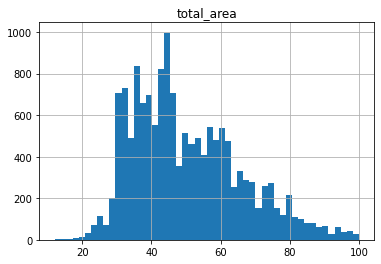

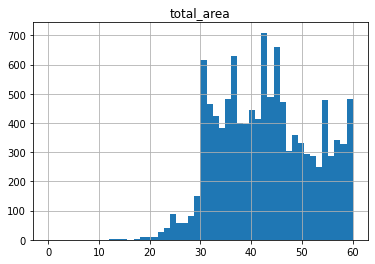

In [70]:
data.hist('total_area', bins=50)
plt.show()
data.hist('total_area', bins=50, range=(0, 60))
plt.show()

In [71]:
print('Медиана общей площади:', data['total_area'].median())
print('Среднее общей площади:', data['total_area'].mean())

Медиана общей площади: 46.6
Среднее общей площади: 50.29468700053277


**Наибольшее число квартир находится в диапазоне общей площади от 30 до 50 квадратных метров.**

**4.2 Рассмотрим данные в столбце `living_area` (жилая площадь).**

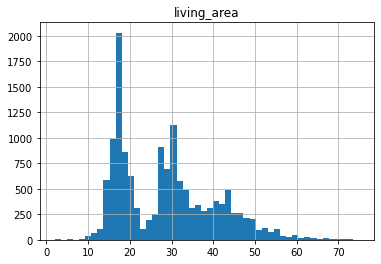

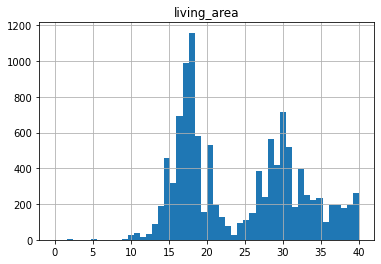

In [72]:
data.hist('living_area', bins=50)
plt.show()
data.hist('living_area', bins=50, range=(0, 40))
plt.show()

In [73]:
print('Медиана жилой площади:', data['living_area'].median())
print('Среднее жилой площади:', data['living_area'].mean())

Медиана жилой площади: 28.0
Среднее жилой площади: 28.764295585086586


**Наибольшие пики жилой площади приходятся на 15-20 и 30 квадратных метров.**

**4.3 Рассмотрим данные в столбце `kitchen_area` (площадь кухни).**

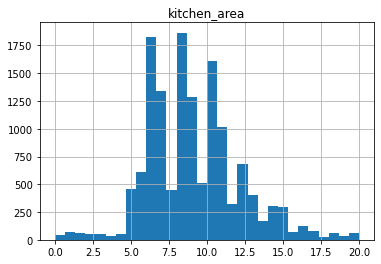

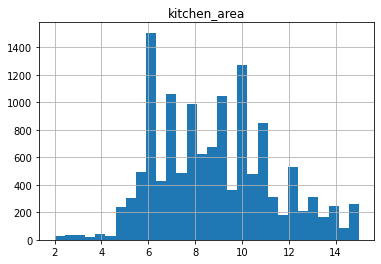

In [74]:
data.hist('kitchen_area', bins=30)
plt.show()
data.hist('kitchen_area', bins=30, range=(2, 15))
plt.show()

In [75]:
print('Медиана площади кухни:', data['kitchen_area'].median())
print('Среднее площади кухни:', data['kitchen_area'].mean())

Медиана площади кухни: 8.7
Среднее площади кухни: 9.035047230499499


**Наибольшее число кухонь имеют площадь от 5 до 12 квадратных метров.**

**4.4 Рассмотрим данные в столбце `last_price` (цена на момент снятия с публикации).**

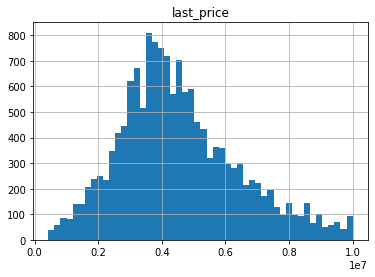

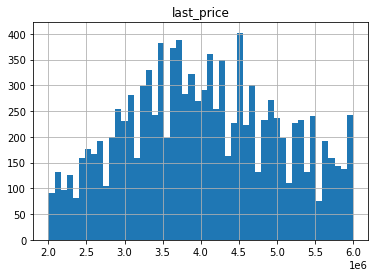

In [76]:
data.hist('last_price', bins=50)
plt.show()
data.hist('last_price', bins=50, range=(2000000, 6000000))
plt.show()

In [77]:
print('Медиана цены:', data['last_price'].median())
print('Среднее цены:', data['last_price'].mean())

Медиана цены: 4250000.0
Среднее цены: 4534001.077517315


**По большей части стоимость жилья варьирует от 2 до 6 млн.**

**4.5 Рассмотрим данные в столбце `rooms` (количество комнат).**

In [78]:
data.groupby('rooms')['rooms'].count()

rooms
0     166
1    6054
2    5333
3    3076
4     370
5      16
6       1
Name: rooms, dtype: int64

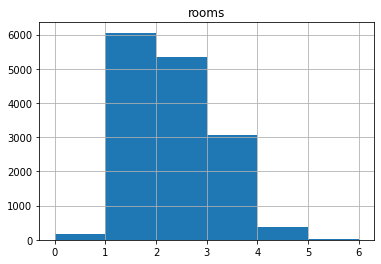

In [79]:
data.hist('rooms', bins=6)
plt.show()

In [80]:
print('Медиана комнат в квартирах:', data['rooms'].median())
print('Среднее комнат в квартирах:', data['rooms'].mean())

Медиана комнат в квартирах: 2.0
Среднее комнат в квартирах: 1.832312200319659


**Много квартир одно- и двухкомнатных, есть квартиры с нулем комнат - скорее всего это студии.**

**4.6 Рассмотрим данные в столбце `ceiling_height` (высота потолков, м).**

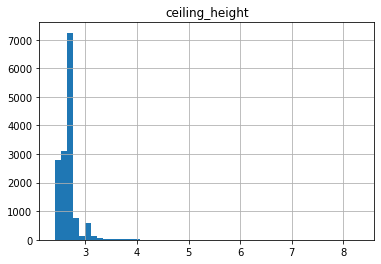

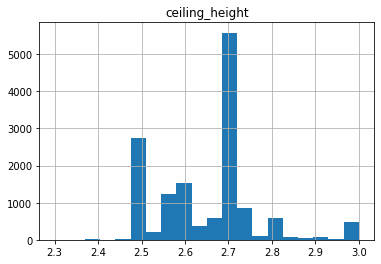

In [81]:
data.hist('ceiling_height', bins=50)
plt.show()
data.hist('ceiling_height', bins=20, range=(2.3, 3))
plt.show()

In [82]:
print('Медиана высоты потолков:', data['ceiling_height'].median())
print('Среднее высоты потолков:', data['ceiling_height'].mean())

Медиана высоты потолков: 2.7
Среднее высоты потолков: 2.674266449120938


**Высота потолков в большинстве квартир составляет 2,7 метра.**

**4.7 Рассмотрим данные в столбце `floor` (этаж квартиры) и в ранее созданном столбце `floor_category`.**

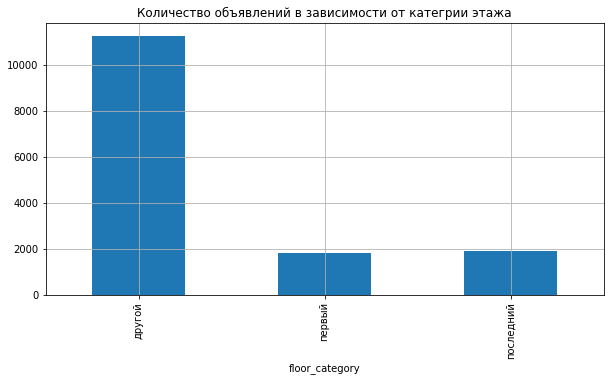

In [83]:
data.groupby('floor_category')['floor'].count().plot(
    x='floor_category', 
    kind='bar', 
    figsize=(10, 5), 
    grid=True,
    title = 'Количество объявлений в зависимости от категрии этажа'
)
plt.show()

**Большинство квартир находятся не на первом и не на последнем этажах.**

In [84]:
data.groupby('floor')['floor'].count()

floor
1     1846
2     2038
3     1846
4     1657
5     1608
6      820
7      789
8      713
9      737
10     451
11     367
12     381
13     270
14     236
15     224
16     230
17     162
18     130
19      96
20      83
21      75
22      82
23      76
24      42
25      28
26      19
27       8
28       1
31       1
Name: floor, dtype: int64

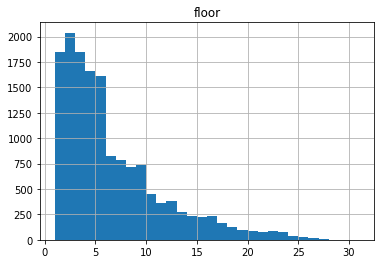

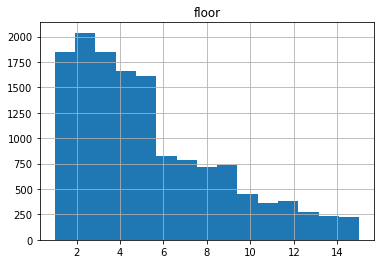

In [85]:
data.hist('floor', bins=30)
plt.show()
data.hist('floor', bins=15, range=(1, 15))
plt.show()

**Видна интересная закономерность - чем выше этаж, тем меньше предложений.**

**4.8 Рассмотрим данные в столбце `floors_total` (всего этажей в доме).**

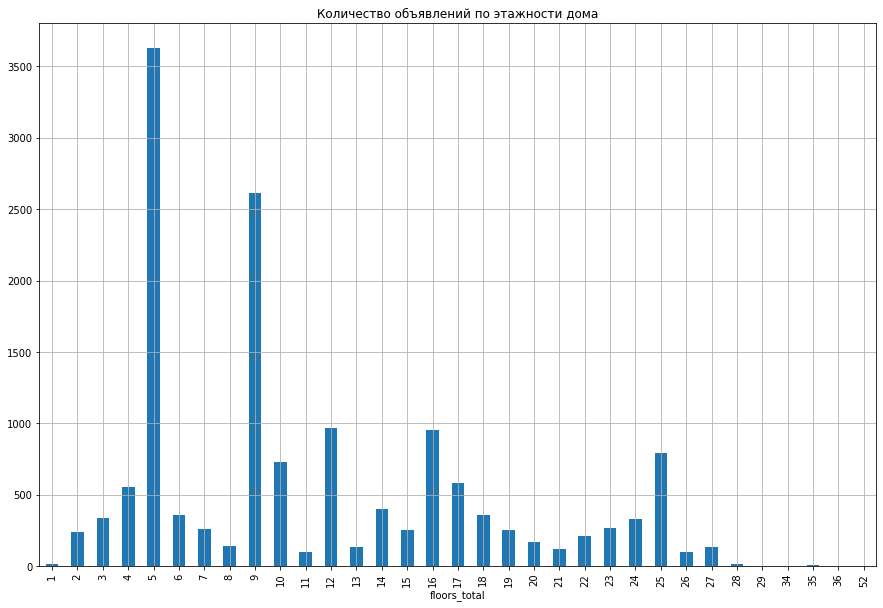

In [86]:
data.groupby('floors_total')['floors_total'].count().plot(
    x='floors_total', 
    kind='bar', 
    figsize=(15, 10), 
    grid=True,
    title = 'Количество объявлений по этажности дома'
)
plt.show()

**Больше всего квартир на продажу в пятиэтажных и девятиэтажных домах.**

**4.9 Рассмотрим данные в столбце `city_centers_nearest` (расстояние до центра города в метрах).**

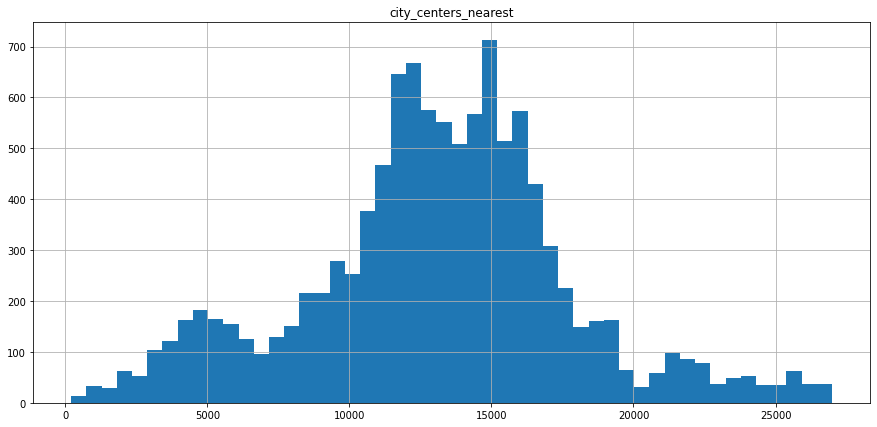

In [87]:
data.hist('city_centers_nearest', bins=50, figsize=(15, 7))
plt.show()

In [88]:
print('Медиана расстояния до центра города:', data['city_centers_nearest'].median())
print('Среднее расстояние до центра города:', data['city_centers_nearest'].mean())

Медиана расстояния до центра города: 13227.5
Среднее расстояние до центра города: 13059.847688497523


**Большинство квартир находится в 10000 - 15000 метрах от центра.**

**4.10 Рассмотрим данные в столбце `airports_nearest` (расстояние до ближайшего аэропорта).**

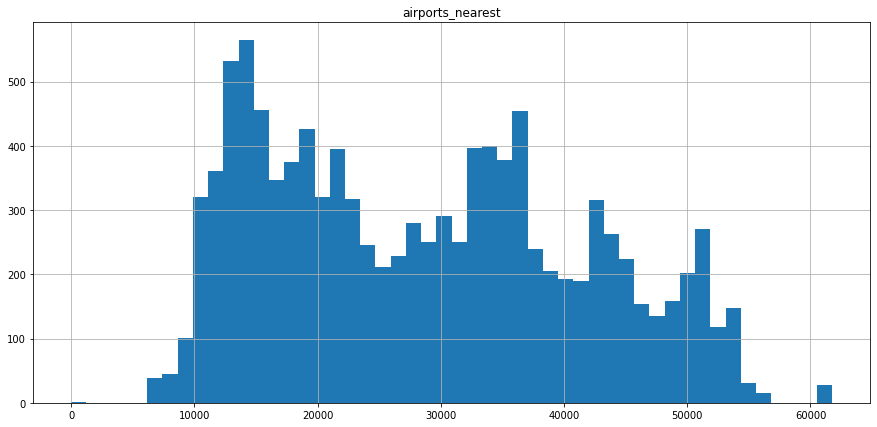

In [89]:
data.hist('airports_nearest', bins=50, figsize=(15, 7))
plt.show()

In [90]:
print('Медиана расстояния до аэропорта:', data['airports_nearest'].median())
print('Среднее расстояние до аэропорта:', data['airports_nearest'].mean())

Медиана расстояния до аэропорта: 27843.0
Среднее расстояние до аэропорта: 28587.132695316093


**Виден всплеск квартир на расстоянии от 10 до 15 км и от 30 до 40 км.**

**4.11 Рассмотрим данные в столбце `parks_nearest` (расстояние до ближайшего парка).**

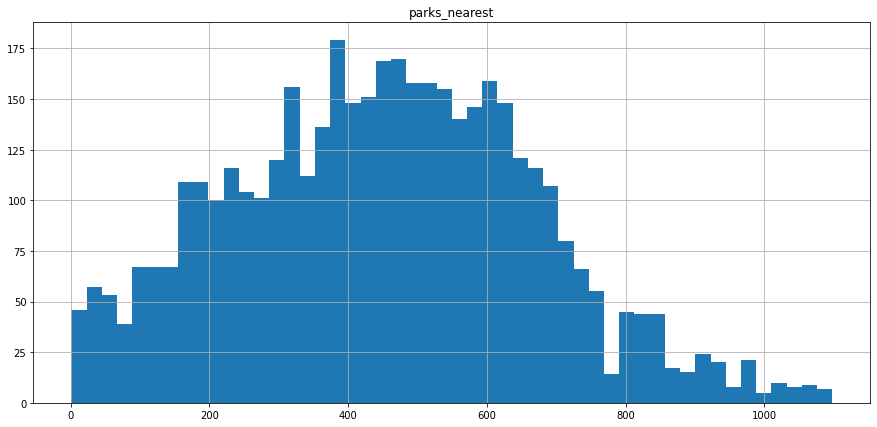

In [91]:
data.hist('parks_nearest', bins=50, figsize=(15, 7))
plt.show()

In [92]:
print('Медиана расстояния до ближайшего парка:', data['parks_nearest'].median())
print('Среднее расстояние до ближайшего парка:', data['parks_nearest'].mean())

Медиана расстояния до ближайшего парка: 453.0
Среднее расстояние до ближайшего парка: 451.0902712815716


**Есть парки, которые находятся в менее чем 100 метрах от квартиры, пока не понятно, это аномалия или дом может находится непосредственно в парке (используя Гугл можно найти много домов, у которых при доме есть собственый парк - например ЖК "Заповедный парк" в Петербурге). В среднем из имеющихся данных парки находятся на расстоянии 400 - 500 метров от квартиры.**

**4.12 Рассмотрим данные в ранее созданных столбцах `day_of_publication` и `month_of_publication` (день и месяц публикации).**

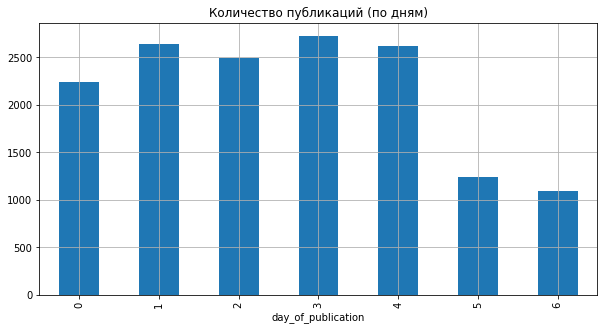

In [93]:
data.groupby('day_of_publication')['day_of_publication'].count().plot(
    x='day_of_publication', 
    kind='bar', 
    figsize=(10, 5),
    grid=True,
    title = 'Количество публикаций (по дням)'
)
plt.show()

0 - понедельник, 

1 - вторник,

2 - среда,

3 - четверг,

4 - пятница,

5 - суббота,

6 - воскресение.

**Заметно, что в будни объявления выкладывают намного чаще, чем в выходные, причем в основном со вторника по четверг. Скорее всего все рабочие моменты и процессы легче сделать в рабочее время по будням (с теми же риелторами встречаться легче в будни в рабочее время).**

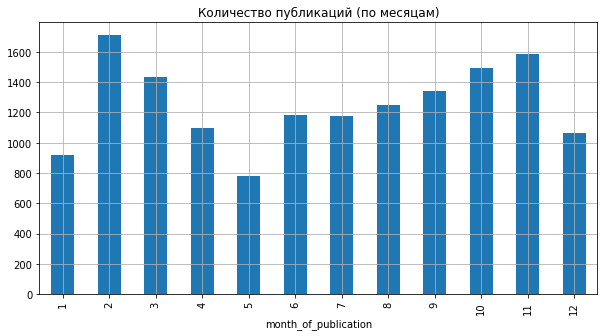

In [94]:
data.groupby('month_of_publication')['month_of_publication'].count().plot(
    x='month_of_publication', 
    kind='bar', 
    figsize=(10, 5),
    grid=True,
    title = 'Количество публикаций (по месяцам)'
)
plt.show()

**В мае, в летние месяцы и в январе публикуют объявлений меньше, чем осенью и весной. Наиболее часто выкладывают объявления в феврале и ноябре. Скорее всего в феврале люди начинают новый год с важных решений, поэтому это продажа старой квартиры и покупка новой. А под конец года люди тоже подводят итоги года, меняют квартиру, чтобы встретить новый год уже в новом жилище.**

**4.13 Рассмотрим данные в столбце `days_exposition` (сколько дней было размещено объявление (от публикации до снятия)).**

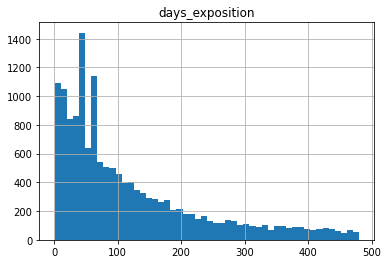

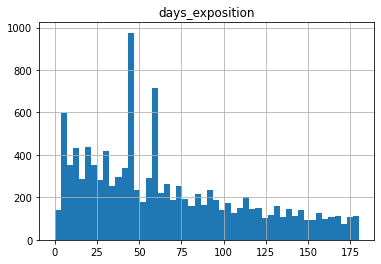

In [95]:
data.hist('days_exposition', bins=50)
plt.show()
data.hist('days_exposition', bins=50, range=(0, 180))
plt.show()

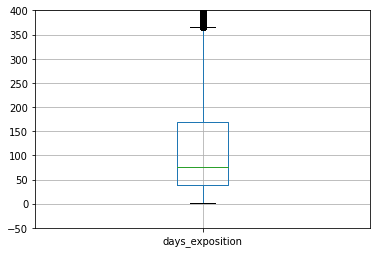

In [96]:
data.boxplot(column=['days_exposition'])
plt.ylim(-50, 400)
plt.show()

In [97]:
data['days_exposition'].describe()

count    15016.000000
mean       119.233218
std        113.208022
min          1.000000
25%         38.000000
50%         75.000000
75%        169.000000
max        480.000000
Name: days_exposition, dtype: float64

**Проведя небольшое исследование выявили следующее:**

1. В среднем объявление висит 119 дней, но уже по медианному значению - 75 дней. Это связанно с тем, что в списке пресутствуют данные с днями более 350 дней, которые искажают среднее значение. Медианное в данном случае более верное.
2. Объявления, где продажа идет более года (365 дней) - это "выбросы", скорее всего объявление просто забыли снять с публикации или еще какая-то ошибка в данных.
3. Тогда, вспоминая диаграмму размаха примем, что значение первого квартиля равное 38 дней - это продажи, которые можно считать быстрыми, а максимальное значение верхнего "уса" - это максимальное нормальное значение, равное 1 году (365 дням) - это необычно долгие продажи. Дальше уже идут выбросы. 
4. Таким образом самое оптимальное время продажи квартиры от 38 до 169 дней (значение межквартильного размаха).

**4.14 Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта.**

**4.14.1 Построим сводную таблицу, где индексом таблицы будет столбец *total_area* (общая площадь), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем среднее значение цены в зависимости от общей площади квартиры (`mean`).**

In [98]:
data_pivot_total_area = data.pivot_table(index=['total_area'], values='last_price', aggfunc=['mean'])
data_pivot_total_area = data_pivot_total_area.reset_index().droplevel(1, axis=1)

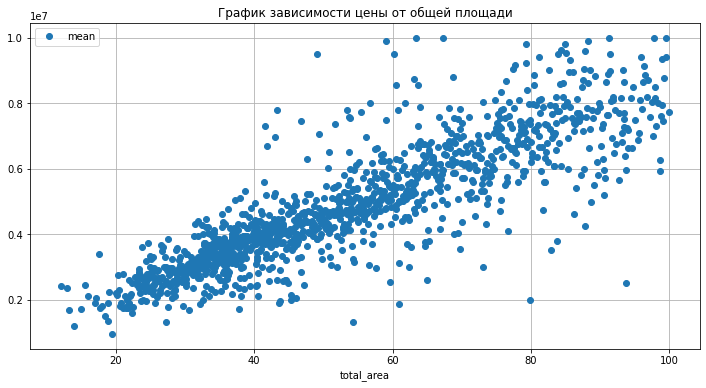

In [99]:
data_pivot_total_area.plot(
    x='total_area',
    y='mean',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от общей площади'
)
plt.show()

In [100]:
data_pivot_total_area['total_area'].corr(data_pivot_total_area['mean'])

0.8597060106947538

В целом наблюдаем, что если растет общая площадь квартиры, то и цена тоже растет. Видим что коэффициент корреляции (0.86) положительный и стремится к 1, что говорит о том, что зависимость роста цены от общей площади квартиры достаточно высока.

**4.14.2 Построим сводную таблицу, где индексом таблицы будет столбец *living_area* (жилая площадь), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем среднее значение цены в зависимости от жилой площади квартиры (`mean`).**

In [101]:
data_pivot_living_area = data.pivot_table(index=['living_area'], values='last_price', aggfunc=['mean'])
data_pivot_living_area = data_pivot_living_area.reset_index().droplevel(1, axis=1)

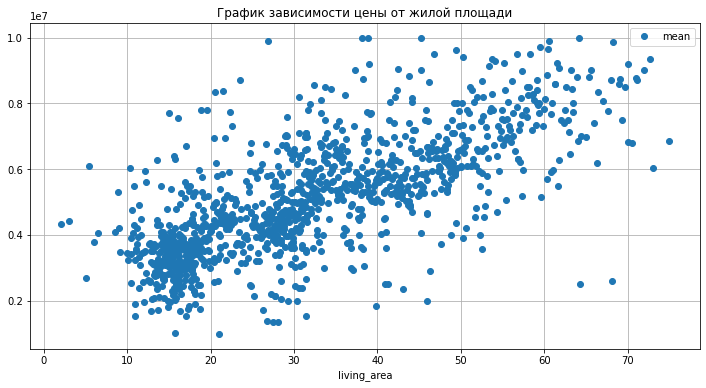

In [102]:
data_pivot_living_area.plot(
    x='living_area',
    y='mean',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от жилой площади'
)
plt.show()

In [103]:
data_pivot_living_area['living_area'].corr(data_pivot_living_area['mean'])

0.7243222685157815

Зависимость такая же, к с общей площадью квартиры. Видим что коэффициент корреляции положительный и стремится к 1, что говорит о том, что зависимость роста цены от жилой площади квартиры высокая, но немного меньше, чем при общей площади (0.86 > 0.72).

**4.14.3 Построим сводную таблицу, где индексом таблицы будет столбец *kitchen_area* (площадь кухни), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем среднее значение цены в зависимости от площади кухни в квартире (`mean`).**

In [104]:
data_pivot_kitchen_area = data.pivot_table(index=['kitchen_area'], values='last_price', aggfunc=['mean'])
data_pivot_kitchen_area = data_pivot_kitchen_area.reset_index().droplevel(1, axis=1)

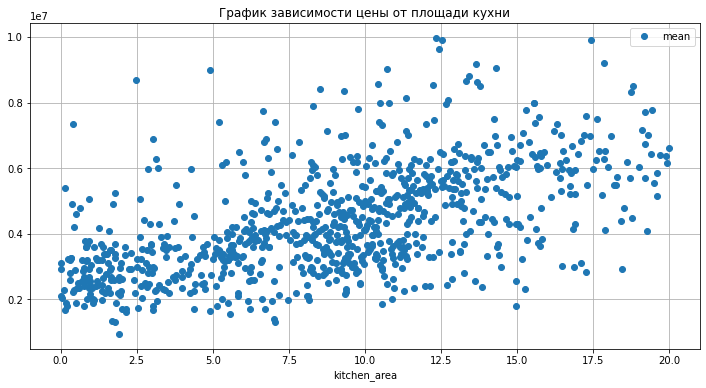

In [105]:
data_pivot_kitchen_area.plot(
    x='kitchen_area',
    y='mean',
    style='o',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от площади кухни'
)
plt.show()

In [106]:
data_pivot_kitchen_area['kitchen_area'].corr(data_pivot_kitchen_area['mean'])

0.5692278654943398

Коэффициент корреляции (0.56) положительный и стремится к 1, что говорит о том, что зависимость роста цены от площади кухни также имеется, однако связь заметно меньше, чем в случае с общей площадью и жилой площадью.

**4.14.4 Построим сводную таблицу, где индексом таблицы будет столбец *rooms* (количество комнат), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем медианное значение цены в зависимости от количества комнат в квартире (`median`).**

In [107]:
data_pivot_rooms = data.pivot_table(index=['rooms'], values='last_price', aggfunc=['median'])
data_pivot_rooms = data_pivot_rooms.reset_index().droplevel(1, axis=1)

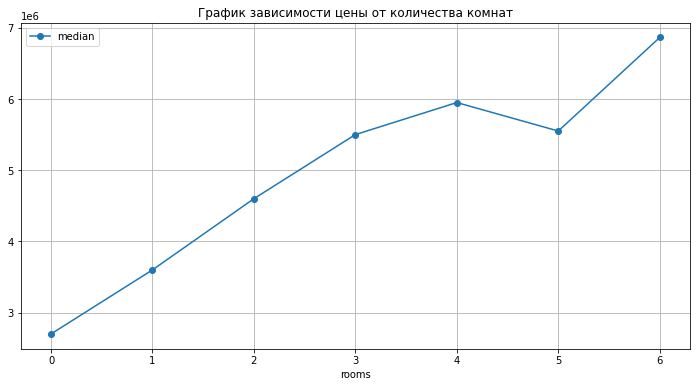

In [108]:
data_pivot_rooms.plot(
    x='rooms',
    y='median',
    style='o-',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от количества комнат'
)
plt.show()

In [109]:
data_pivot_rooms['rooms'].corr(data_pivot_rooms['median'])

0.9548054984211488

Коэффициент корреляции (0.95) положительный и стремится к 1, есть явная связь между ростом цены и количесвом комнат в квартире.

**4.14.5 Построим сводную таблицу, где индексом таблицы будет столбец *floor_category* (тип этажа), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем медианное значение цены в зависимости от типа этажа квартиры (`median`).**

In [110]:
data_pivot_floor_category = data.pivot_table(index=['floor_category'], values='last_price', aggfunc=['median'])
data_pivot_floor_category = data_pivot_floor_category.reset_index().droplevel(1, axis=1)

In [111]:
data_pivot_floor_category

,floor_category,median
0,другой,4400000
1,первый,3650000
2,последний,3900000


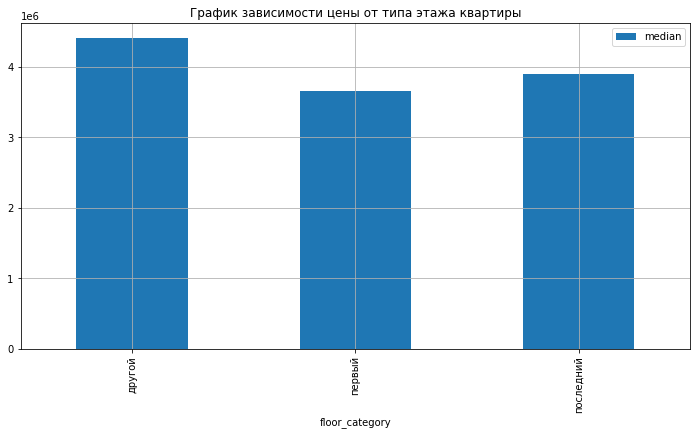

In [112]:
data_pivot_floor_category.plot(
    x='floor_category',
    kind = 'bar',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от типа этажа квартиры'
)
plt.show()

Первые этажи стоят дешевле, чем все остальные. Возможно, это связано с тем, что если дом не новый, то с улицы видно все, что происходит в квартире, такую квартиру труднее продать и следовательно поэтому цену делают ниже, чем во всех остальных случаях. Квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.

**4.14.6 Построим сводные таблицы, где индексами таблицы будут столбцы *day_of_publication, month_of_publication, year_of_publication* (день, месяц и год публикации), значение таблицы будет считаться по столбцу *last_price* (цена). Найдем медианное значение цены в зависимости от даты публикации(`median`).**

In [113]:
data_pivot_day = data.pivot_table(index=['day_of_publication'], values='last_price', aggfunc=['median'])
data_pivot_day = data_pivot_day.reset_index().droplevel(1, axis=1)

In [114]:
data_pivot_day

,day_of_publication,median
0,0,4300000
1,1,4200000
2,2,4299000
3,3,4290000
4,4,4200000
5,5,4300000
6,6,4153500


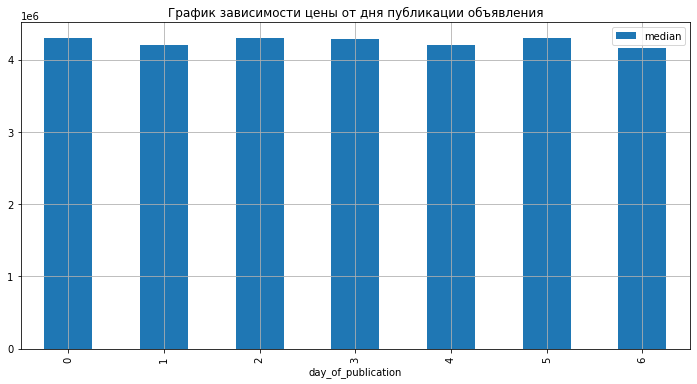

In [115]:
data_pivot_day.plot(
    x='day_of_publication',
    kind = 'bar',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от дня публикации объявления'
)
plt.show()

In [116]:
data_pivot_month = data.pivot_table(index=['month_of_publication'], values='last_price', aggfunc=['median'])
data_pivot_month = data_pivot_month.reset_index().droplevel(1, axis=1)

In [117]:
data_pivot_month

,month_of_publication,median
0,1,4295000
1,2,4250000
2,3,4200000
3,4,4300000
4,5,4250000
5,6,4100000
6,7,4200000
7,8,4299500
8,9,4300000
9,10,4290000


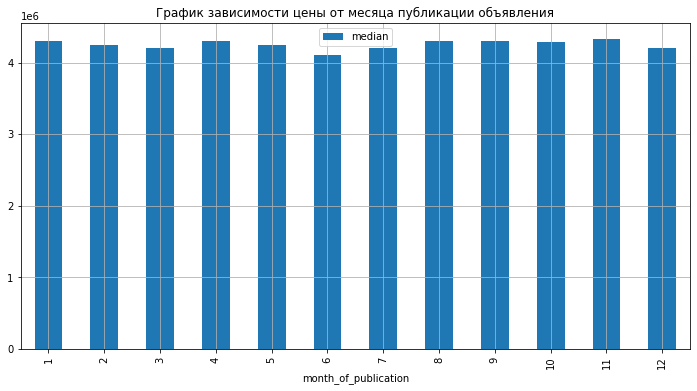

In [118]:
data_pivot_month.plot(
    x='month_of_publication',
    kind = 'bar',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от месяца публикации объявления'
)
plt.show()

In [119]:
data_pivot_year = data.pivot_table(index=['year_of_publication'], values='last_price', aggfunc=['median','count'])
data_pivot_year = data_pivot_year.reset_index().droplevel(1, axis=1)

In [120]:
data_pivot_year

,year_of_publication,median,count
0,2015,4355502,332
1,2016,4180000,1579
2,2017,4200000,5967
3,2018,4270000,6214
4,2019,4600000,924


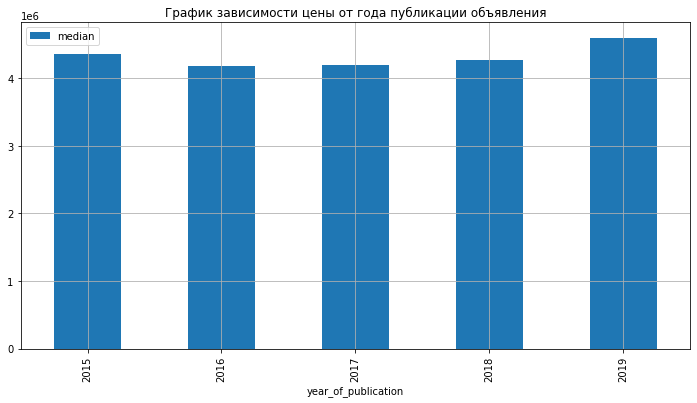

In [121]:
data_pivot_year.plot(
    x='year_of_publication',
    y='median',
    kind = 'bar',
    grid=True,
    figsize=(12, 6),
    title = 'График зависимости цены от года публикации объявления'
)
plt.show()

**Вроде какой либо зависимости цены от даты размещения объявления не выявлено. Но рассмотрим динамику изменения цены и площади продаваемых квартир по имеющимся годам.**

In [122]:
data_pivot_price_area = data.pivot_table(index=['year_of_publication'], values=['last_price', 'total_area'], aggfunc=['mean'])
data_pivot_price_area = data_pivot_price_area.reset_index().droplevel(1, axis=1)
data_pivot_price_area.columns=['year_of_publication', 'last_price_mean','total_area_mean']

In [123]:
data_pivot_price_area['year_of_publication'] = data_pivot_price_area['year_of_publication'].astype('str')

In [124]:
data_pivot_price_area

,year_of_publication,last_price_mean,total_area_mean
0,2015,4.669728e+06,53.840361
1,2016,4.523758e+06,51.271001
2,2017,4.503372e+06,50.731151
3,2018,4.506931e+06,49.735742
4,2019,4.882579e+06,48.292673


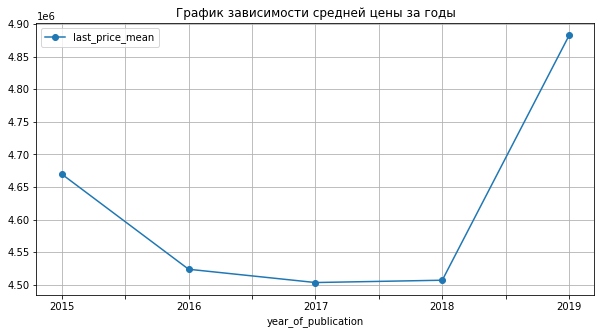

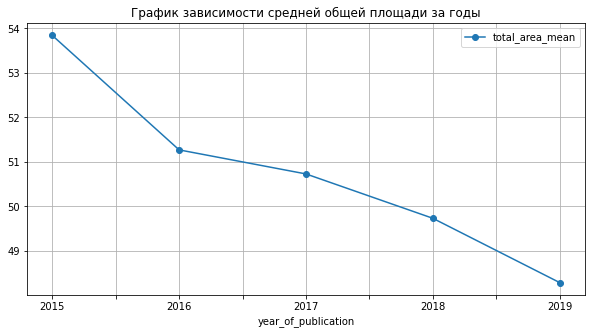

In [125]:
data_pivot_price_area.plot(
    x='year_of_publication',
    y='last_price_mean',
    style='o-',
    grid=True,
    figsize=(10, 5),
    title = 'График зависимости средней цены за годы'
)
plt.show()
data_pivot_price_area.plot(
    x='year_of_publication',
    y='total_area_mean',
    style='o-',
    grid=True,
    figsize=(10, 5),
    title = 'График зависимости средней общей площади за годы'
)
plt.show()

**Средняя общая продаваемая площадь квартир за годы падает. Даже если не учитывать 2015 и 2019 года (так как у них маленькая выборка данных), то все равно видна зависимость, причем видно, что упала не столько цена, сколько площадь продаваемых квартир.**

**4.15 Посчитаем среднюю цену одного квадратного метра в топ-10 населённых пунктах с наибольшим числом объявлений и в топ-10 населенных пунктах с наименьшим числом объявлений.**

**Создадим сводную таблицу `data_pivot_top_locality_name`, в которой через индекс зададим *locality_name*, значение таблицы будет считаться по столбцу *last_price* (цена) и *total_area* (общая площадь). Найдем сумму и количество значений цены и площади для определенного населенного пункта.**

In [126]:
data_pivot_top_locality_name = data.pivot_table(index='locality_name',
                                                values=['last_price', 'total_area'],
                                                aggfunc=['sum', 'count'])
data_pivot_top_locality_name = data_pivot_top_locality_name.reset_index().droplevel(1, axis=1)
data_pivot_top_locality_name.columns=['locality_name', 'last_price_sum','total_area_sum','last_price_count','total_area_count']

**Остортируем по убыванию и выделим топ-10 населенных пунктов по стоимости квартир.**

In [127]:
data_pivot_top_locality_name.sort_values(by=['last_price_count'],ascending=False, inplace=True)
data_pivot_top_locality_name = data_pivot_top_locality_name.iloc[:10]

**Найдем среднюю цену одного квадратного метра, разделив суммарную цену на суммарную площадь.**

In [128]:
data_pivot_top_locality_name['mean_price'] = data_pivot_top_locality_name['last_price_sum'] / data_pivot_top_locality_name['total_area_sum']

**Отсортируем по средней цене по убыванию и построим график.**

In [129]:
data_pivot_top_locality_name = data_pivot_top_locality_name.sort_values(by='mean_price', ascending=False).reset_index(drop=True)

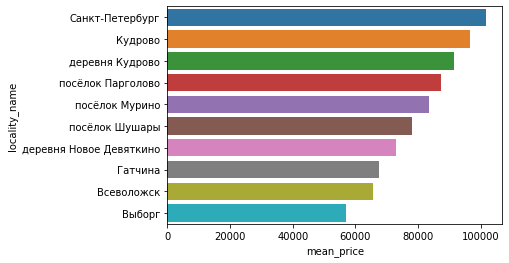

In [130]:
sns.barplot(
    x=data_pivot_top_locality_name['mean_price'], 
    y=data_pivot_top_locality_name['locality_name'],
)
plt.show()

In [131]:
data_pivot_top_locality_name

,locality_name,last_price_sum,total_area_sum,last_price_count,total_area_count,mean_price
0,Санкт-Петербург,53201818219,523018.47,10225,10225,101720.725501
1,Кудрово,575800156,5955.25,132,132,96687.822677
2,деревня Кудрово,1040290972,11376.17,251,251,91444.745639
3,посёлок Парголово,1214496309,13920.10,279,279,87247.671281
4,посёлок Мурино,1819976730,21813.41,505,505,83433.847803
5,посёлок Шушары,873000800,11206.91,222,222,77898.439445
6,деревня Новое Девяткино,413513347,5663.72,110,110,73010.909261
7,Гатчина,776305060,11481.92,236,236,67611.084209
8,Всеволожск,1040571623,15865.82,295,295,65585.744891
9,Выборг,522125000,9183.60,180,180,56854.065944


**Наибольшая цена квадратного метра в городе Санкт-Петербург и ближайших к нему населенных пунктах (городах). В Санкт-Петербурге средняя цена равна 102000 за квадратный метр.**

**Проделаем все те же операции, но наоборот, построим таблицу `data_pivot_antitop_locality_name` и найдем антитоп-10 населенных пунктов по стоимости квартир.**

In [132]:
data_pivot_antitop_locality_name = data.pivot_table(index='locality_name',
                                                values=['last_price', 'total_area'],
                                                aggfunc=['sum', 'count'])
data_pivot_antitop_locality_name = data_pivot_antitop_locality_name.reset_index().droplevel(1, axis=1)
data_pivot_antitop_locality_name.columns=['locality_name', 'last_price_sum','total_area_sum','last_price_count','total_area_count']

In [133]:
data_pivot_antitop_locality_name.sort_values(by=['last_price_count'],ascending=True, inplace=True)
data_pivot_antitop_locality_name = data_pivot_antitop_locality_name.iloc[:10]

In [134]:
data_pivot_antitop_locality_name['mean_price'] = data_pivot_antitop_locality_name['last_price_sum'] / data_pivot_antitop_locality_name['total_area_sum']

In [135]:
data_pivot_antitop_locality_name = data_pivot_antitop_locality_name.sort_values(by='mean_price', ascending=True).reset_index(drop=True)

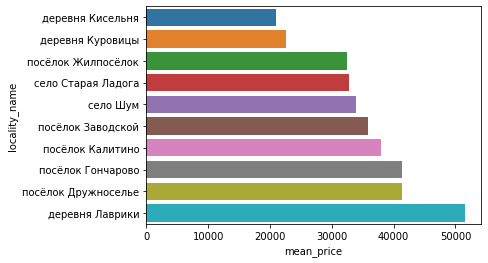

In [136]:
sns.barplot(x=data_pivot_antitop_locality_name['mean_price'], y=data_pivot_antitop_locality_name['locality_name'])
plt.show()

In [137]:
data_pivot_antitop_locality_name

,locality_name,last_price_sum,total_area_sum,last_price_count,total_area_count,mean_price
0,деревня Кисельня,1150000,55.0,1,1,20909.090909
1,деревня Куровицы,1150000,50.9,1,1,22593.320236
2,посёлок Жилпосёлок,1650000,50.8,1,1,32480.314961
3,село Старая Ладога,1800000,55.0,1,1,32727.272727
4,село Шум,2000000,59.0,1,1,33898.305085
5,посёлок Заводской,1650000,46.0,1,1,35869.565217
6,посёлок Калитино,1990000,52.4,1,1,37977.099237
7,посёлок Гончарово,1750000,42.3,1,1,41371.158392
8,посёлок Дружноселье,1200000,29.0,1,1,41379.310345
9,деревня Лаврики,3381777,65.6,1,1,51551.478659


**Минимальная средняя цена наблюдается в деревнях и поселках. Самая низкая цена обнаружена в деревне Кисельня - всего 21000 за квадратный метр.**

**4.16 Вычислим среднюю цену каждого километра до центра города Санкт-Петербурга и опишем, как стоимость объектов зависит от расстояния до центра города.**

In [138]:
price_km = data[data['locality_name']=='Санкт-Петербург'].pivot_table(
    index='city_centers_nearest_km',
    values='last_price',
    aggfunc='mean'
)
price_km

,last_price
city_centers_nearest_km,
0.0,6.480000e+06
1.0,7.378264e+06
2.0,7.171784e+06
3.0,6.451613e+06
4.0,6.737251e+06
5.0,6.765956e+06
6.0,6.403766e+06
7.0,6.142185e+06
8.0,5.863308e+06


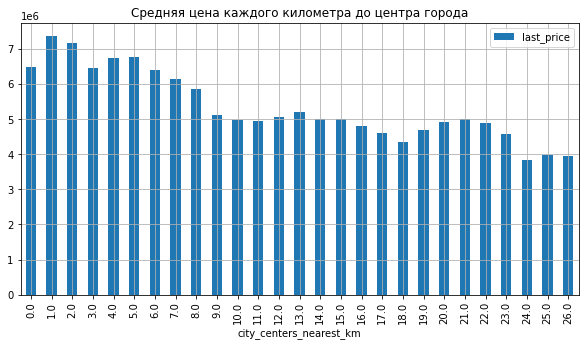

In [139]:
price_km.plot(
    kind='bar', 
    figsize=(10, 5), 
    grid=True,
    title = 'Средняя цена каждого километра до центра города'
);

In [140]:
print('Средняя цена километра до центра города (0...26 км):', (price_km.loc[0, 'last_price'] - price_km.loc[26, 'last_price']) / 26)

Средняя цена километра до центра города (0...26 км): 96759.52814258913


**Очевидно, чем ближе квартира к центру, тем ее цена дороже. Средняя цена каждого километра от центра города выходит в среднем 97 тыс.**

### Общий вывод

На анализ был предоставлен датасет `real_estate_data.csv` - архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Была проведена предобработка данных, заполнены пропуски, убраны явные и неявные дубликаты, удалены лишние аномалии, в результате чего была получена таблица, готовая к анализу.

**В данной таблице были изучены и описаны следующие параметры:**

1. `total_area` (общая площадь), `living_area` (жилая площадь), `kitchen_area` (площадь кухни). Наибольшее число квартир находится в диапазоне общей площади от 30 до 50 квадратных метров, жилая площадь - в диапазоне от 15-20 до 30 квадратных метров и площадь кухонь - от 5 до 12 квадратных метров.

2. `last_price` (цена на момент снятия с публикации). Цены варьируются в среднем от 2 до 6 млн, но есть цены и менее 1 млн, так и более 100 млн.

3. `rooms` (количество комнат в квартире). В среднем встречаются одно-, двух- и трехкомнатные квартиры. Имеются квартиры и с 10 и более комнатами. Есть студии с нулем комнат.

4. `ceiling_height` (высота потолков). Средняя высота потолков составляет 2,7 метра. Имеются потолки и более 10 метров, но такие данные мы отсеяли и рассмтаривали потолки от 2,4 до 10 метров.

5. `floor` (этаж квартиры). Большинство квартир находятся не на первом и не на последнем этажах. Видна интересная закономерность, что чем выше этаж, тем меньше предложений.

6. `floors_total` (всего этажей в доме). Больше всего квартир на продажу в пятиэтажных и девятиэтажных домах.

7. `city_centers_nearest` (расстояние до центра города в метрах) и `city_centers_nearest_km` (в километрах). Есть квартиры, которые находятся в близости от центра (менее 500 метров) и квартиры, которые находятся на расстоянии более 50 км от центра. Большинство квартир находится в 10 - 15 километрах от центра.

8. `airports_nearest` (расстояние до ближайшего аэропорта). Есть квартиры, которые находятся менее чем в 7 км от аэропорта и квартиры - более чем в 70 км от аэропорта. Большинство квартир находится в 10 до 15 км и есть впслеск от 30 до 40 км.

9. `parks_nearest` (расстояние до ближайшего парка в метрах). В среднем из имеющихся данных парки находятся на расстоянии 500 метров от квартиры. После 3 км расстояний для парков практичеки нет, возможно потому, что данные для парков, которые находятся на расстоянии более 3 км скорее всего просто не вносились в таблицу. 

10. `first_day_exposition` (дата публикации) и созданные столбцы `day_of_publication` (день недели публикации), `month_of_publication` (месяц публикации), `year_of_publication` (год публикации). В будни объявления выкладывают намного чаще, чем в выходные, причем в основном со вторника по четверг. В мае, в летние месяцы и в январе публикуют объявлений меньше, чем осенью и весной. Наиболее часто выкладывают объявления в феврале и ноябре.

11. `days_exposition` (сколько дней было размещено объявление (от публикации до снятия). В среднем объявление висит 119 дней, но уже по медианному значению - 75 дней. Это связанно с тем, что в списке пресутствуют данные с днями более 350 дней, которые искажают среднее значение. Получаем, что быстрой продажей можно назвать объявления до 38 дней, долгой - от 1 года и более.

**Рассмотрели какие факторы больше всего влияют на общую (полную) стоимость объекта:**

1. Зависимость от общей площади квартиры, жилой площади и площади кухни в целом имеется, коэффициент корреляции положительный и стремится к 1, что говорит о том, что зависимость роста цены от роста этих параметров есть. 

2. Есть явная связь между ростом цены и количесвом комнат в квартире, коэффициент корреляции в данном случае практически равен 1. С ростом количества комнат растет и цена.

3. Первые и последние этажи стоят немного дешевле, чем все остальные, но разница не небольшая.

4. Выявлено, что если рассматривать данные в срезе годов, то видно что упала не столько цена, сколько площадь продаваемых квартир.

**Посчитали среднюю цену одного квадратного метра в топ-10 населённых пунктах с наибольшим числом объявлений и в топ-10 населенных пунктах с наименьшим числом объявлений:**

Наибольшая цена квадратного метра в городе Санкт-Петербург - 102 тыс. за квадратный метр. А минимальная средняя цена наблюдается в деревнях и поселках (деревне Кисельня - всего 21 тыс. за квадратный метр).

**Вычислили среднюю цену каждого километра при приближении к центру города:**

Чем ближе квартира к центру, тем ее цена дороже. Средняя цена каждого километра выходит 97 тыс. рублей. Но километры ближе к центру стоят дороже, чем удаленные от центра.
